# <span style="color:green">THE SPARKS FOUNDATION GRIP NOV'20</span>

## AUTHOR : YUKTY KHANDELIA

## TASK #2 : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### TECHNIQUE - USING K-MEANS CLUSTERING FOR UNSUPERVISED ML

### Import modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Convert provided dataset to pandas dataframe

In [2]:
np.random.seed(0)

df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Preprocessing the data

In [3]:
df = df.drop("Id" , axis = 1)

In [4]:
#converting to numpy array
dataset = df.values
Y = dataset[:,-1]
train_X = dataset[:,:-1]

### Visualising the provided dataset

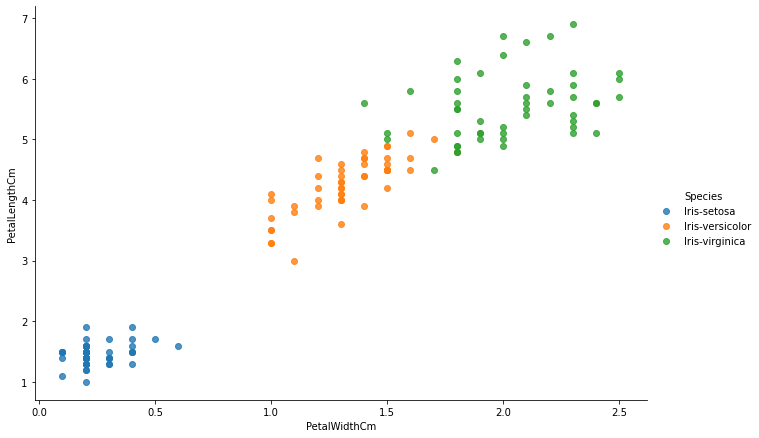

In [5]:
sns.lmplot(data= df , x = "PetalWidthCm" , y = "PetalLengthCm" , hue = "Species" , fit_reg = False , height = 6 , aspect = 1.5  )

### K-Means Algorithm Implementation

In [6]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [7]:
class Kmeans:
    def __init__(self , K = 5, max_iters = 100 , plot_steps = False):
        self.K = K;
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        
        #initialising the cluster
        self.clusters = [[] for _ in range(self.K)]
        
        #initialising the  centroid
        self.centroids = []
        
    def predict(self , X):
        self.X = X
        self.n_samples , self.n_features = X.shape
        
        #initialise centroids as k random values from X
        random_indices = np.random.choice(self.n_samples , self.K , replace = False)
        self.centroids = [self.X[idx] for idx in random_indices]
        
        #optimization
        for _ in range(self.max_iters):
            
            #update clusters
            self.clusters = self._create_clusters(self.centroids)
                
            #update centroids
            centroid_old = self.centroids
            self.centroids = self._get_centroid(self.clusters)
            
            #check if converged
            if self._is_converged(centroid_old, self.centroids):
                break
            
        #return cluster_labels
        return self._get_cluster_label(self.clusters)
        
    def _create_clusters(self , centroids):
        clusters = [[] for _ in range(self.K)]
        
        for idx , sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample , centroids)
            clusters[centroid_idx].append(idx)
            
        return clusters
    
    def _closest_centroid(self , sample , centroid):
        distances = [euclidean_distance(sample , point) for point in centroid]
        return np.argmin(distances)
            
    def _get_centroid(self , clusters):
        centroids = np.zeros((self.K , self.n_features))
        
        for cluster_idx , cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster] , axis=0)
            centroids[cluster_idx] = cluster_mean
            
        return centroids
    
    def _is_converged(self , old , new):
        distances = [euclidean_distance(old[i],new[i]) for i in range(self.K)]
        
        return sum(distances) == 0
    
    def _get_cluster_label(self , clusters):
        labels = np.empty(self.n_samples)
        
        for label , cluster in enumerate(clusters):
            for idx in cluster:
                labels[idx] = label + 1
                
        return labels

### Application

In [8]:
k = Kmeans(K = 3 , max_iters = 150 )
y_pred =k.predict(train_X)
df["y_pred"] = y_pred

### Visualising the Clusters formed

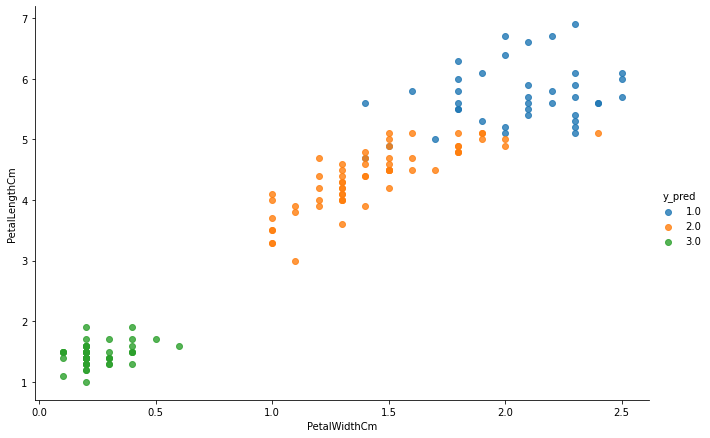

In [9]:
sns.lmplot(data= df , x = "PetalWidthCm" , y = "PetalLengthCm" , hue = "y_pred", fit_reg = False , height = 6 , aspect = 1.5  )